In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
online_retail = pd.read_excel('Online Retail.xlsx')

In [3]:
online_retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
56934,541123,22260,FELT EGG COSY BLUE RABBIT,12,2011-01-14 09:52:00,0.85,13385.0,United Kingdom
385598,570210,22209,WOOD STAMP SET HAPPY BIRTHDAY,2,2011-10-09 10:48:00,0.83,13259.0,United Kingdom
67501,541832,21955,DOORMAT UNION JACK GUNS AND ROSES,1,2011-01-21 17:14:00,7.95,17889.0,United Kingdom
78546,542890,22788,BROCANTE COAT RACK,2,2011-02-01 13:25:00,9.95,15311.0,United Kingdom
459422,575875,22350,ILLUSTRATED CAT BOWL,1,2011-11-11 13:06:00,4.96,NaN,United Kingdom
465756,576252,22576,SWALLOW WOODEN CHRISTMAS DECORATION,12,2011-11-14 13:55:00,0.85,14418.0,United Kingdom
257299,559523,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2011-07-08 17:19:00,12.75,13955.0,United Kingdom
426561,573359,21983,PACK OF 12 BLUE PAISLEY TISSUES,4,2011-10-30 12:48:00,0.39,14178.0,United Kingdom
241346,558198,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2011-06-27 12:49:00,2.08,14104.0,United Kingdom
334435,566249,22219,LOVEBIRD HANGING DECORATION WHITE,6,2011-09-11 12:09:00,0.85,13527.0,United Kingdom


#### Data Cleansing and Validation

In [4]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# Exploring the null columns
online_retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Exploring the invalid quantities
online_retail[online_retail['Quantity'] <= 0].Quantity.describe()

count    10624.000000
mean       -45.607210
std       1092.214216
min     -80995.000000
25%        -10.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64

In [8]:
# Exploring the invalid unit prices
online_retail[online_retail['UnitPrice'] <= 0].UnitPrice.describe()

count     2517.000000
mean        -8.789877
std        311.761926
min     -11062.060000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: UnitPrice, dtype: float64

In [9]:
# Counting the number of cancelled invoices
(online_retail['InvoiceNo'].str.contains('C', na = False)).sum()

9288

In [10]:
# Making a copy before cleaning the dataset
retail_clean = online_retail.copy(deep = True)

In [11]:
# Approximately 25% of customer ID's were null. Before moving forward with the analysis, I'll exclude the rows where no CustomerID was found.
retail_clean.dropna(subset = ['CustomerID'], inplace=True)

In [12]:
# Checking the Quantity and UnitPrice columns after dropping the missing CustomerID's
retail_clean[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [13]:
# How many quantities are still negative?
retail_clean[retail_clean['Quantity'] <= 0].Quantity.count()

8905

In [14]:
# Let's take a look at a few rows to get an idea of how to handle these
retail_clean[retail_clean['Quantity'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [15]:
# Are cancelled invoices recorded with negative quantities? Counting the rows for cancelled invoices
(retail_clean['InvoiceNo'].str.startswith('C')).sum()

8905

In [16]:
# The row count of negative quantities and cancelled invoices are the same. Double checking if cancelled invoices are observed with quantities > 0
len(retail_clean[(retail_clean['InvoiceNo'].str.startswith('C')) & (retail_clean['Quantity'] > 0)])

0

In [17]:
# Excluding the negative quantities, which will also take care of the cancelled invoices
retail_clean = retail_clean[retail_clean['Quantity'] > 0]
retail_clean.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
# This isn't as essential to the analysis, but I've decided to change the ID to intger because precision is not needed
retail_clean['CustomerID'] = retail_clean['CustomerID'].astype(int)

#### Retention Rate by Monthly Cohorts

In [20]:
# The cohort date stores the earliest transaction by customer ID. The granularity for this analysis will be by month
retail_clean['CohortDate'] = retail_clean.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [21]:
def cohort_index(df, id, current_date, cohort_date): # The function takes in the dataframe, CustomerID, InvoiceDate, and CohortDate
    
    # Extract the year and month for InvoiceDate and CohortDate
    current_year, current_month = df[current_date].dt.year, df[current_date].dt.month
    cohort_year, cohort_month = df[cohort_date].dt.year, df[cohort_date].dt.month

    # Calculate the cohort index by finding the elapsed time between the latest invoice date and cohort date
    df['CohortIndex'] = (current_year - cohort_year) * 12 + (current_month - cohort_month)
    
    return df

In [22]:
cohort_df = cohort_index(retail_clean, 'CustomerID', 'InvoiceDate', 'CohortDate')
cohort_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CohortDate,CohortIndex
182673,552563,22430,ENAMEL WATERING CAN CREAM,16,2011-05-10 11:54:00,4.25,17597,United Kingdom,2011-05,0
271291,560688,20728,LUNCH BAG CARS BLUE,10,2011-07-20 11:54:00,1.65,16393,United Kingdom,2010-12,7
120878,546682,22424,ENAMEL BREAD BIN CREAM,1,2011-03-16 08:31:00,12.75,12994,United Kingdom,2011-03,0
236286,557746,23168,CLASSIC CAFE SUGAR DISPENSER,3,2011-06-22 12:24:00,1.25,15059,United Kingdom,2011-01,5
238874,557957,21429,RED GINGHAM ROSE JEWELLERY BOX,8,2011-06-23 19:20:00,1.95,13969,United Kingdom,2010-12,6


In [23]:
# Creating a dataframe that counts active users by cohort month and index
cohort_summary = cohort_df.groupby(['CohortDate', 'CohortIndex'])['CustomerID'].nunique().reset_index(name = 'Users')
cohort_summary.head(15)

,CohortDate,CohortIndex,Users
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321
5,2010-12,5,352
6,2010-12,6,321
7,2010-12,7,309
8,2010-12,8,313
9,2010-12,9,350


In [24]:
# Calculate the retention rate by dividng the number users for each cohort by the number of users at the beginning of the month
cohort_summary['RetentionRate'] = cohort_summary['Users'] / cohort_summary.groupby('CohortDate')['Users'].transform('max')

In [25]:
# Pivot the table
cohort_pivot = pd.pivot_table(data=cohort_summary, values = 'RetentionRate', index = 'CohortDate', columns = 'CohortIndex')
cohort_pivot

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortDate,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


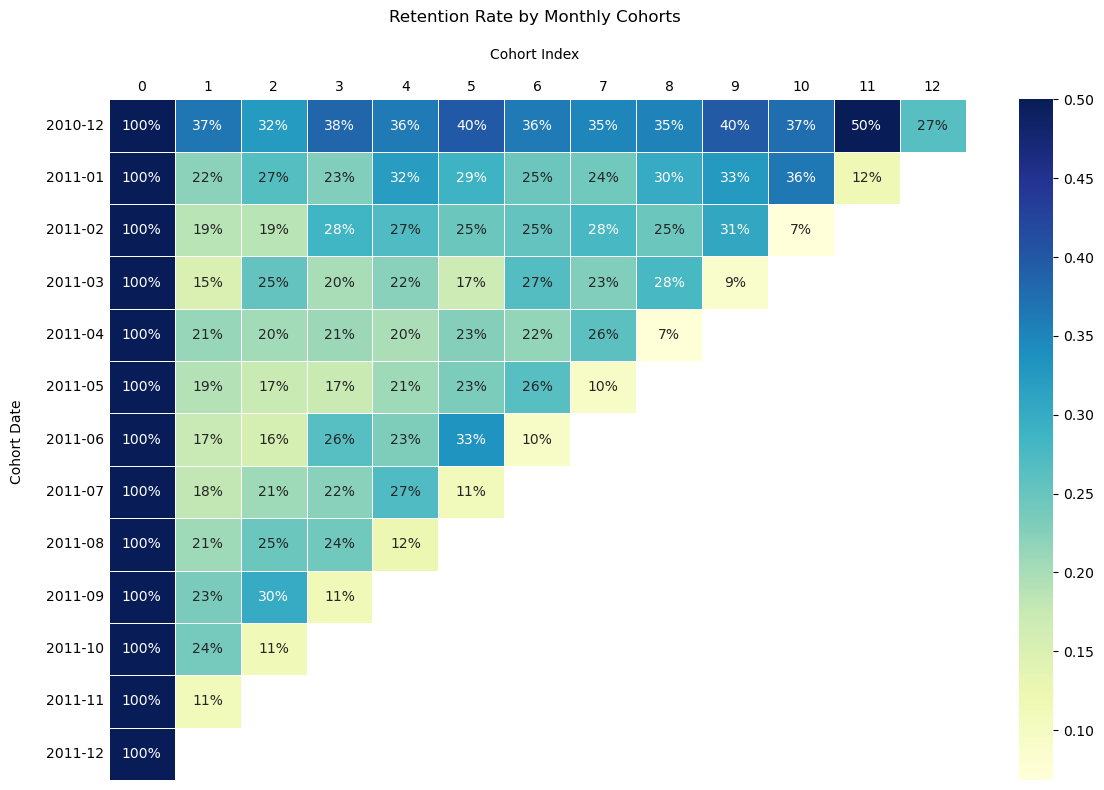

In [26]:
# Plot the heatmap
f, ax = plt.subplots(figsize = (12,8))
cohort_matrix = sns.heatmap(data = cohort_pivot, cmap = 'YlGnBu', annot = True, fmt = '.0%', linewidths = 0.5, vmax = 0.5).set_title('Retention Rate by Monthly Cohorts \n')
ax.set_xlabel('Cohort Index \n')
ax.set_ylabel('Cohort Date \n')
ax.xaxis.set_label_position('top') 
ax.tick_params(length = 0, labelbottom = False, labeltop = True)
f.tight_layout()
plt.show()

#### Average Unit Price by Monthly Cohorts

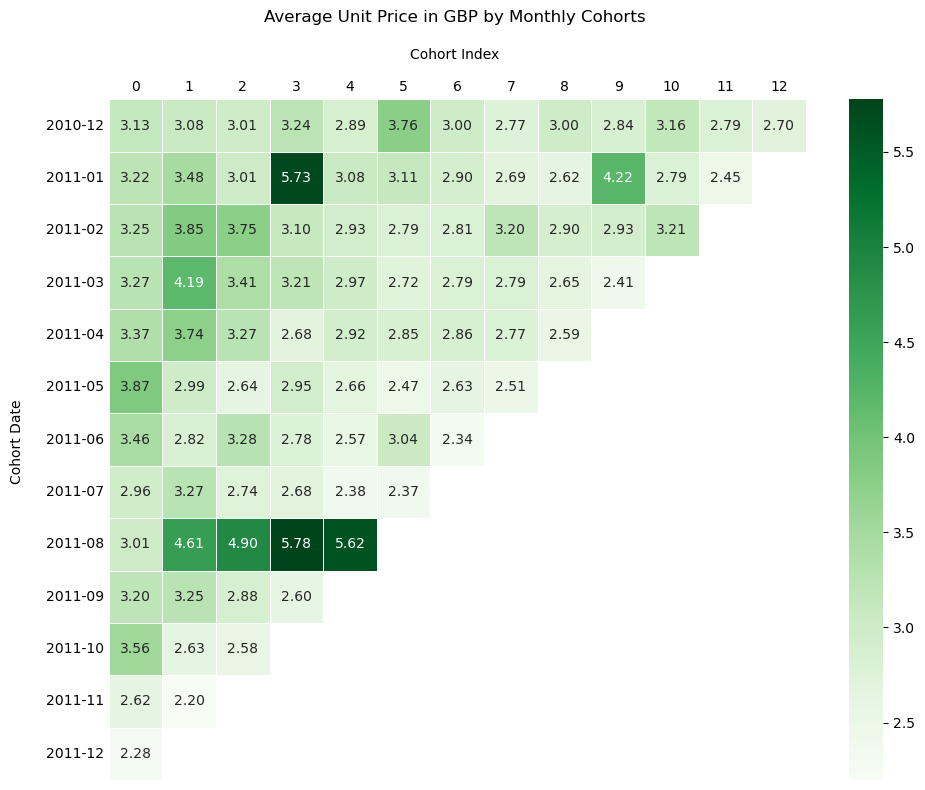

In [27]:
# Creating a pivot table for average unit prices observed by cohorts
avg_price_cohorts = cohort_df.groupby(['CohortDate', 'CohortIndex'])['UnitPrice'].mean().unstack()

# Rinse and repeat, but with unit prices as the feature
f2, ax2 = plt.subplots(figsize = (10,8))
price_cohort = sns.heatmap(data = avg_price_cohorts, annot=True, fmt='.2f', cmap = 'Greens', linewidths=0.5).set_title('Average Unit Price in GBP by Monthly Cohorts \n')
ax2.set_xlabel('Cohort Index \n')
ax2.set_ylabel('Cohort Date \n')
ax2.xaxis.set_label_position('top') 
ax2.tick_params(length = 0, labelbottom = False, labeltop = True)
plt.tight_layout()
plt.show()


#### Average Quantities Purchased by Monthly Cohorts

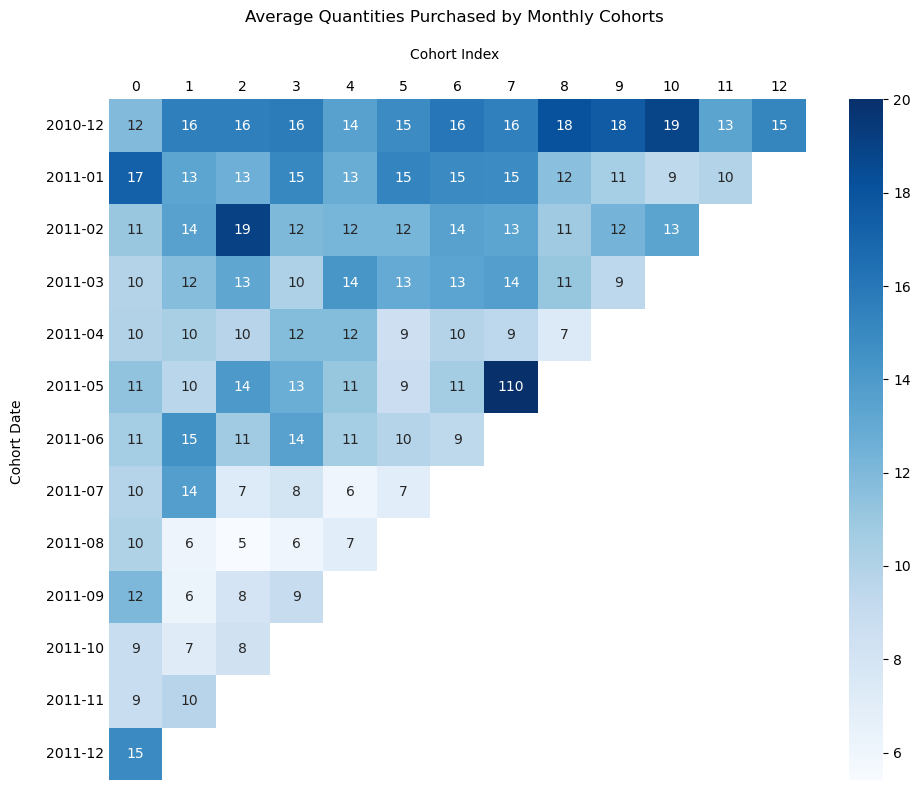

In [28]:
# Pivot table for monthly average quanities by cohorts
avg_quantity_cohorts = cohort_df.groupby(['CohortDate', 'CohortIndex'])['Quantity'].mean().unstack()

f3, ax3 = plt.subplots(figsize=(10,8))
quantity_cohort = sns.heatmap(data = avg_quantity_cohorts, annot = True, fmt = '.0f', cmap = 'Blues', vmax = 20).set_title('Average Quantities Purchased by Monthly Cohorts \n')
ax3.set_xlabel('Cohort Index \n')
ax3.set_ylabel('Cohort Date \n')
ax3.xaxis.set_label_position('top') 
ax3.tick_params(length = 0, labelbottom = False, labeltop = True)
plt.tight_layout()
plt.show()